In [382]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from pyramid.arima import auto_arima
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt
from scipy import stats


In [636]:
dfs = {} 
for i in ["HON","MMM","SYF","BAYZF"]:
    dfs[i]=pd.read_csv('/Users/chenpengguan/Downloads/Data Given/'+ i + '.csv')

    
#df = pd.read_csv('/Users/chenpengguan/Downloads/Data Given/BAYZF.csv')



dfs_test={}
for i in ["HON_test","MMM_test","SYF_test","BAYZF_test"]:
    dfs_test[i]=pd.read_csv('/Users/chenpengguan/Downloads/Data Given/'+ i + '.csv')

    
Date=dfs_test["HON_test"][["Date"]]



In [318]:
##convert date column to pandas datetime

for i in ["HON","MMM","SYF","BAYZF"]:
    dfs[i]['datetime'] = pd.to_datetime(dfs[i]['Date'])
    dfs[i] = dfs[i].set_index('datetime')
    dfs[i].drop(['Date'], axis=1, inplace=True)

for i in ["HON_test","MMM_test","SYF_test","BAYZF_test"]:
    dfs_test[i]['datetime'] = pd.to_datetime(dfs_test[i]['Date'])
    dfs_test[i] = dfs_test[i].set_index('datetime')
    dfs_test[i].drop(['Date'], axis=1, inplace=True)
    
    
HON = dfs["HON"]
MMM = dfs["MMM"]
SYF = dfs["SYF"]    
BAYZF=dfs["BAYZF"]



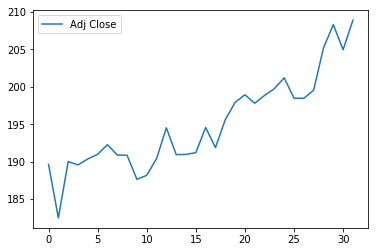

In [120]:

dfs_test["MMM_test"]['Adj Close'].plot(label='Adj Close', legend=True)
plt.show()

In [94]:
list(df)

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [517]:
import statsmodels.api as sm

# Add a constant to the features
#train_features = sm.add_constant(dfs[i][['Open', 'High', 'Low', 'Close',  'Volume']])



##get training_targets
train_targets={}
for i in ["HON","MMM","SYF","BAYZF"]:
    train_targets[i]=dfs[i]["Close"]


#test_features = sm.add_constant(test[['Open', 'High', 'Low', 'Close',  'Volume']])

##get test_targets
test_targets={}
for i in ["HON_test","MMM_test","SYF_test","BAYZF_test"]:
    test_targets[i]=dfs_test[i]["Close"]

    



    

# Create a size for the training set that is 85% of the total number of samples



In [95]:
model = sm.OLS(train_targets, train_features)
results = model.fit()  # fit the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.027e+05
Date:                Sat, 16 Feb 2019   Prob (F-statistic):               0.00
Time:                        02:56:36   Log-Likelihood:                -7416.5
No. Observations:                2487   AIC:                         1.485e+04
Df Residuals:                    2478   BIC:                         1.490e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Open          -0.5011      0.373     -1.343      0.1

In [63]:
print(results.pvalues)

# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

Open         1.793683e-01
High         2.070031e-04
Low          7.329369e-03
Close        6.728026e-03
Volume       4.447987e-02
weekday_1    1.003578e-20
weekday_2    4.443733e-21
weekday_3    2.523119e-20
weekday_4    1.116113e-18
dtype: float64


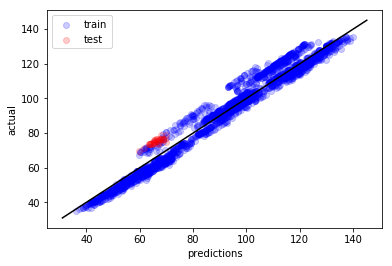

In [64]:

# Scatter the predictions vs the targets with 80% transparency
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha=0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()

In [67]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test_targets, test_predictions))
print(rmse)

9.139479180406235


## Adding more features for Random Forest

In [38]:
train_features = df[['Open', 'High', 'Low', 'Close',  'Volume']]

train_targets=df["Adj Close"]

test = pd.read_csv('/Users/chenpengguan/Downloads/Data Given/BAYZF_test.csv')
test['datetime'] = pd.to_datetime(test['Date'])
test = test.set_index('datetime')
test.drop(['Date'], axis=1, inplace=True)


test_features = test[['Open', 'High', 'Low', 'Close',  'Volume']]

test_targets=test["Adj Close"]




# Create 2 new volume features, 1-day % change and 5-day SMA of the % change


#train_features['Adj_Volume_1d_change'] = train_features['Volume'].pct_change()
#test_features['Adj_Volume_1d_change'] = test_features['Volume'].pct_change()






In [39]:
# Use pandas' get_dummies function to get dummies for day of the week
days_of_week = pd.get_dummies(train_features.index.dayofweek,
                              prefix='weekday',
                              drop_first=True)

# Set the index as the original DataFrame index for merging
days_of_week.index = train_features.index

# Join the dataframe with the days of week DataFrame
train_features = pd.concat([train_features, days_of_week], axis=1)

# Add days of week to feature names
feature_names.extend(['weekday_' + str(i) for i in range(1, 5)])
train_features.dropna(inplace=True)  # drop missing values in-place
print(train_features.head())

                 Open       High        Low      Close  Volume  weekday_1  \
datetime                                                                    
2009-02-13  55.549999  55.549999  55.549999  55.549999     100          0   
2009-02-17  53.400002  53.400002  53.099998  53.200001     400          1   
2009-02-18  53.400002  53.400002  53.299999  53.299999     300          0   
2009-02-19  54.250000  54.250000  53.750000  53.750000     500          0   
2009-02-20  52.299999  52.299999  51.900002  51.910000     500          0   

            weekday_2  weekday_3  weekday_4  
datetime                                     
2009-02-13          0          0          1  
2009-02-17          0          0          0  
2009-02-18          1          0          0  
2009-02-19          0          1          0  
2009-02-20          0          0          1  


In [40]:
days_of_week = pd.get_dummies(test_features.index.dayofweek,
                              prefix='weekday',
                              drop_first=True)

# Set the index as the original DataFrame index for merging
days_of_week.index = test_features.index

# Join the dataframe with the days of week DataFrame
test_features = pd.concat([test_features, days_of_week], axis=1)

# Add days of week to feature names
feature_names.extend(['weekday_' + str(i) for i in range(1, 5)])
test_features.dropna(inplace=True)  # drop missing values in-place
print(test_features.head())

                 Open       High        Low      Close  Volume  weekday_1  \
datetime                                                                    
2019-01-02  69.599998  69.599998  69.599998  69.599998     400          0   
2019-01-03  71.510002  71.510002  71.510002  71.510002     300          0   
2019-01-04  73.190002  75.330002  73.190002  73.750000     500          0   
2019-01-07  73.750000  75.699997  73.750000  74.699997    1000          0   
2019-01-08  76.269997  76.449997  74.629997  76.349998    3800          1   

            weekday_2  weekday_3  weekday_4  
datetime                                     
2019-01-02          1          0          0  
2019-01-03          0          1          0  
2019-01-04          0          0          1  
2019-01-07          0          0          0  
2019-01-08          0          0          0  


In [41]:

# Create the random forest model and fit to the training data


estimator = RandomForestRegressor().fit(train_features, train_targets)
test_prediction = estimator.predict(test_features)

In [42]:
test_prediction

array([56.3247618, 59.4420873, 61.954624 , 73.509491 , 61.3218928,
       61.0712595, 61.3600868, 63.8518521, 60.1893942, 63.0332395,
       59.5046083, 59.5531175, 59.585457 , 61.8400095, 60.3124773,
       72.2263775, 65.4301944, 61.2641832, 62.6129486, 60.482072 ,
       61.3173745, 62.2199982, 66.5196037, 65.4955726, 65.7348285,
       65.105037 , 61.6880271, 61.7125814, 61.7125814, 62.1200607,
       60.3608683, 59.9000223])

In [35]:
len(test_prediction)

32

In [36]:
len(test_targets)

32

In [44]:
rmse = sqrt(mean_squared_error(test_targets, test_prediction))
print(rmse)

13.048890074425


In [54]:
from sklearn.model_selection import ParameterGrid

# Create a dictionary of hyperparameters to search
grid = {'n_estimators': [200], 'max_depth': [10], 'max_features': [4,6,8], 'random_state': [42]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_features, train_targets)
    test_scores.append(rfr.score(test_features, test_targets))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

-50.76791772136542 {'random_state': 42, 'n_estimators': 200, 'max_features': 8, 'max_depth': 10}


In [52]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=10, max_features=8, random_state=42)
rfr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)


In [53]:
rmse = sqrt(mean_squared_error(test_targets, test_predictions))
print(rmse)

12.98470761363791


## Auto Arima

In [142]:

model={}
forecast={}
for i in ["HON","MMM","SYF","BAYZF"]:
    train_targets[i]=train_targets[i].dropna()
    
for i in ["HON","MMM","SYF","BAYZF"]:
    model[i] = auto_arima(train_targets[i], trace=True, error_action='ignore', suppress_warnings=True)
    model[i].fit(train_targets[i])

    forecast[i] = model[i].predict(n_periods=len(test_targets["{}_test".format(i)]))
    forecast[i] = pd.DataFrame(forecast[i],index = test_targets["{}_test".format(i)].index,columns=['test_predictions_arima'])


Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=6861.572, BIC=6896.552, Fit time=2.534 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=6865.987, BIC=6877.647, Fit time=0.281 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=6866.808, BIC=6884.298, Fit time=0.182 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=6866.793, BIC=6884.283, Fit time=0.197 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=6870.761, BIC=6899.911, Fit time=0.267 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=6865.013, BIC=6905.823, Fit time=2.739 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=6864.909, BIC=6905.719, Fit time=2.329 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=6868.767, BIC=6892.087, Fit time=0.505 seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 0, 

In [145]:
test_targets["MMM_test"]

datetime
2019-01-02    189.638885
2019-01-03    182.498245
2019-01-04    190.006348
2019-01-07    189.569366
2019-01-08    190.363861
2019-01-09    190.979614
2019-01-10    192.270691
2019-01-11    190.890244
2019-01-14    190.850510
2019-01-15    187.642685
2019-01-16    188.178970
2019-01-17    190.393677
2019-01-18    194.515167
2019-01-22    190.939880
2019-01-23    190.969681
2019-01-24    191.198105
2019-01-25    194.554886
2019-01-28    191.873428
2019-01-29    195.597687
2019-01-30    197.901764
2019-01-31    198.924683
2019-02-01    197.792511
2019-02-04    198.835312
2019-02-05    199.739044
2019-02-06    201.179108
2019-02-07    198.467834
2019-02-08    198.447983
2019-02-11    199.530502
2019-02-12    205.151642
2019-02-13    208.279999
2019-02-14    204.929993
2019-02-15    208.860001
Name: Adj Close, dtype: float64

In [147]:
rmse={}
for i in ["HON","MMM","SYF","BAYZF"]:
    rmse[i] = sqrt(mean_squared_error(test_targets["{}_test".format(i)], forecast[i]))
    print(rmse)

{'HON': 9.246305257006233}
{'HON': 9.246305257006233, 'MMM': 6.708627802958603}
{'HON': 9.246305257006233, 'MMM': 6.708627802958603, 'SYF': 5.285779135035542}
{'HON': 9.246305257006233, 'MMM': 6.708627802958603, 'SYF': 5.285779135035542, 'BAYZF': 5.693487179834548}


In [78]:
rmse = sqrt(mean_squared_error(test_targets["HON_test"], forecast[""]))
print(rmse)

5.693487179834548


## Visualization

In [272]:
train_targets={}
for i in ["HON","MMM","SYF","BAYZF"]:

    train_targets[i]=dfs[i][["Date","Close"]]
    train_targets[i]['datetime'] = pd.to_datetime(train_targets[i]['Date'])
    train_targets[i] = train_targets[i].set_index('datetime')
    train_targets[i].drop(['Date'], axis=1, inplace=True)




/Users/chenpengguan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [273]:
#subset 2018 only 
for i in ["HON","MMM","SYF","BAYZF"]:

    train_targets[i] = train_targets[i].loc['2018-01-02':'2018-12-31']

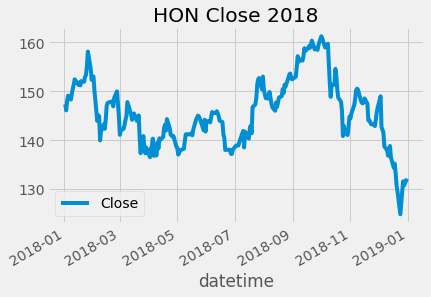

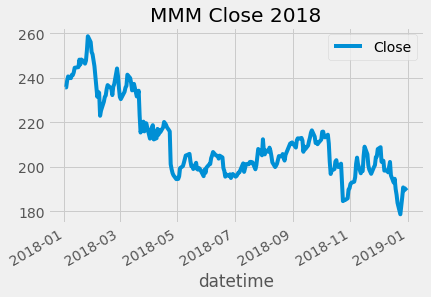

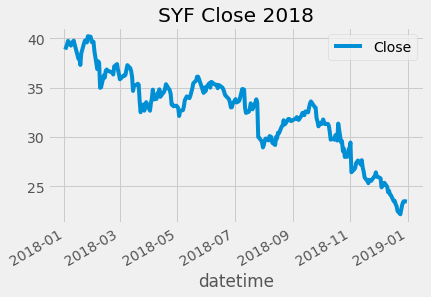

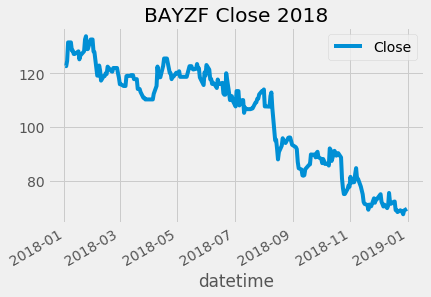

In [276]:

    for i in ["HON","MMM","SYF","BAYZF"]:
        plt.style.use('fivethirtyeight')

# Plot the time series
        ax1 = train_targets[i].plot()
        ax1.set_title( i + ' Close 2018')
#ax1.axvline('2018-12-31', color='grey', linestyle='--')

# Add a green horizontal line
#ax1.axhline(4, color='green', linestyle='--')


    plt.show()

In [279]:
for i in ["HON","MMM","SYF","BAYZF"]:
    print(train_targets[i].describe())

            Close
count  251.000000
mean   145.767338
std      6.815757
min    124.830002
25%    141.098114
50%    144.946289
75%    150.345703
max    161.279068
            Close
count  251.000000
mean   211.174183
std     16.863822
min    178.619995
25%    199.375000
50%    205.160004
75%    217.724999
max    258.630005
            Close
count  251.000000
mean    32.566932
std      4.165189
min     22.170000
25%     29.990000
50%     33.240002
75%     35.259998
max     40.209999
            Close
count  251.000000
mean   103.990757
std     19.096996
min     67.459999
25%     87.610001
50%    110.500000
75%    119.120003
max    133.789993


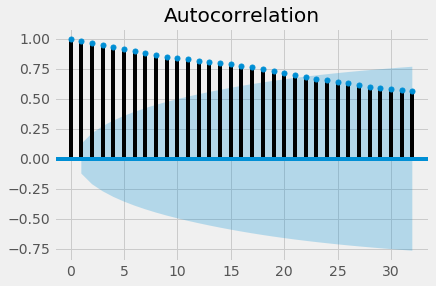

In [265]:
plt.style.use('fivethirtyeight')
fig = tsaplots.plot_acf(train_targets["BAYZF"], lags=32)

# Show plot
plt.show()

In [ ]:
##THis is a ACF plot displaying the autocorrelation with lags of 32 days. 
##It tells us between each 32 or more days period, there is a positive coorelaiton.


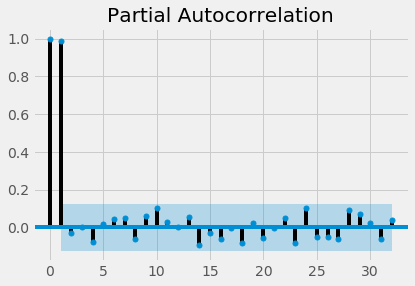

In [266]:
fig = tsaplots.plot_pacf(train_targets["BAYZF"], lags=32)

# Show plot
plt.show()

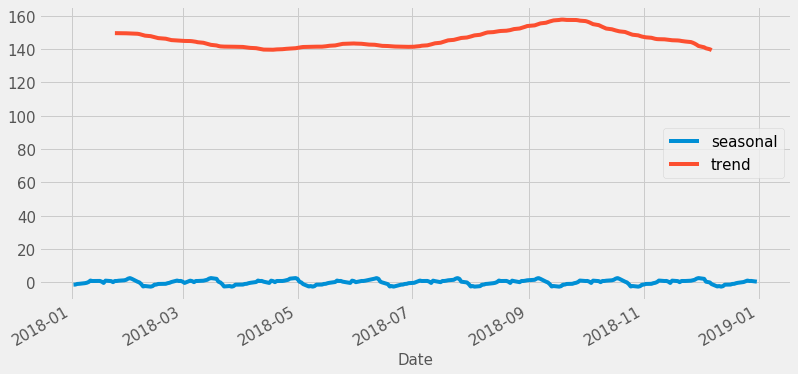

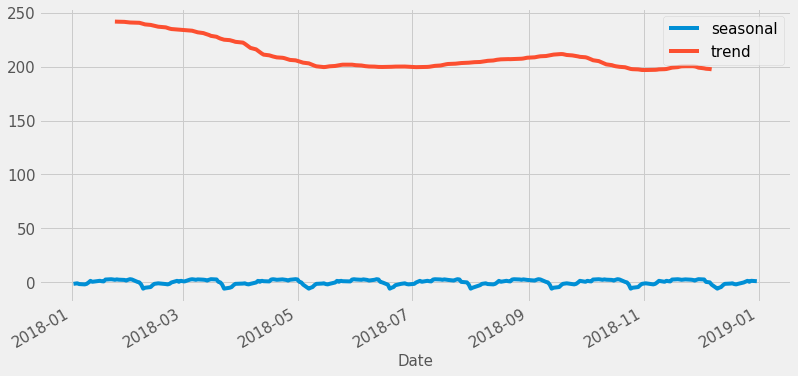

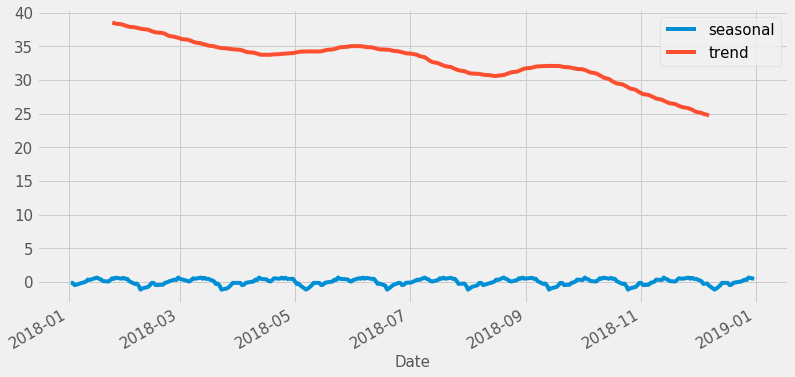

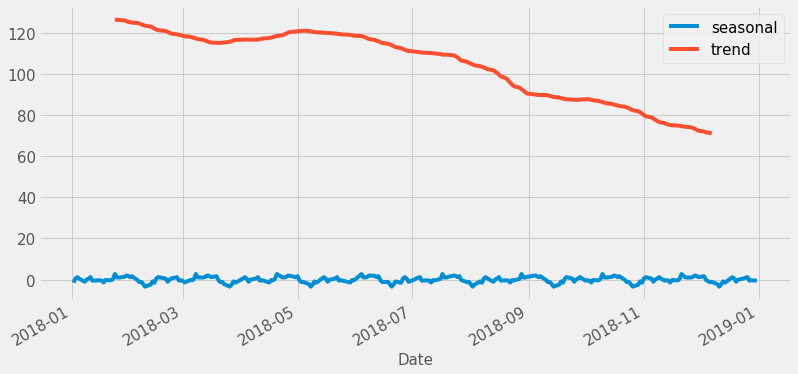

In [290]:

decomposition={}
train_decomposed={}
for i in ["HON","MMM","SYF","BAYZF"]:
    decomposition[i] = sm.tsa.seasonal_decompose(train_targets[i],freq=30)


    train_decomposed[i]=train_targets[i].copy()

    train_decomposed[i]["seasonal"]=decomposition[i].seasonal
    train_decomposed[i]["trend"] = decomposition[i].trend

    train_decomposed[i]=train_decomposed[i].drop(['Close'], axis=1)


    ax = train_decomposed[i].plot(figsize=(12, 6), fontsize=15)

# Specify axis labels
    ax.set_xlabel('Date', fontsize=15)
    plt.legend(fontsize=15)
    plt.show()

In [ ]:
mmm=pd.read_pickle("/Users/chenpengguan/Downloads/output/3m_stocktwits.pickle","gzip")


In [287]:
targets=train_targets["HON"].copy()

for i in ["HON","MMM","SYF","BAYZF"]:
  targets[i]=train_targets[i]

targets=targets.drop(['Close'], axis=1)


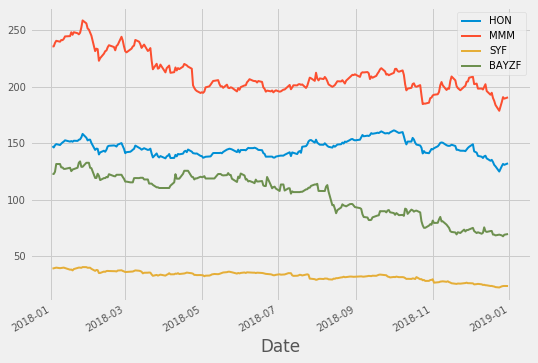

In [288]:
ax = targets.plot(linewidth=2, fontsize=10,figsize=(8, 6))

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=10)

# Show plot
plt.show()

## Naive Prediction with a shift

In [304]:
test_pred={}

for i in ["HON","MMM","SYF","BAYZF"]:
    test_pred[i]=train_targets[i].loc['2018-01-02':'2018-02-15']-(train_targets[i].loc['2018-01-02']-train_targets[i].loc['2018-12-31'])


In [306]:
for i in ["HON","MMM","SYF","BAYZF"]:
    rmse = sqrt(mean_squared_error(test_targets["{}_test".format(i)], test_pred[i]))
    print(rmse)

11.937467013380918
12.420411590631597
6.039421648066276
5.756926160506181


## Linear Model

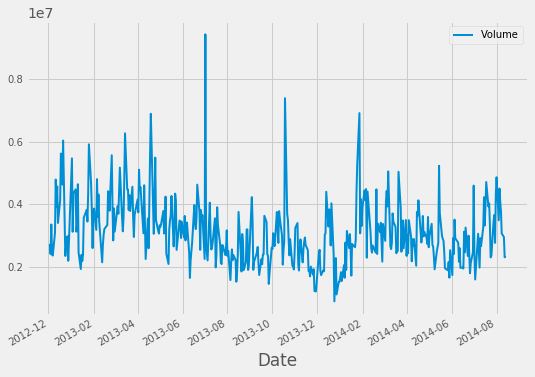

In [325]:


HON_1 = dfs["HON"][["Volume"]].loc['2012-12-01':'2014-08-13']
dfs["HON"][["Volume"]].max()
ax = HON_1.plot(linewidth=2, fontsize=10,figsize=(8, 6))

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=10)

# Show plot
plt.show()

In [334]:
dfs["HON"].index

DatetimeIndex(['2009-01-02', '2009-01-05', '2009-01-06', '2009-01-07',
               '2009-01-08', '2009-01-09', '2009-01-12', '2009-01-13',
               '2009-01-14', '2009-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='datetime', length=2516, freq=None)

In [339]:
#HON_1["Volume"].idxmax()

Timestamp('2013-07-02 00:00:00')

In [596]:
HON=pd.read_csv('/Users/chenpengguan/Downloads/Data Given/HON.csv')
MMM=pd.read_csv('/Users/chenpengguan/Downloads/Data Given/MMM.csv')
BAYZF=pd.read_csv('/Users/chenpengguan/Downloads/Data Given/BAYZF.csv')
SYF=pd.read_csv('/Users/chenpengguan/Downloads/Data Given/SYF.csv')

In [622]:
y_1=HON["Close"][2236:2268]
y_2=MMM["Close"][2265:2297]
y_3=BAYZF["Close"][2236:2268]
y_4=SYF["Close"][862:894]
X = np.arange(1, 33, 1)

In [625]:

slope_1, intercept_1, r_value, p_value, std_err = stats.linregress(X, y_1)

slope_2, intercept_2, r_value, p_value, std_err = stats.linregress(X, y_2)


slope_3, intercept_3, r_value, p_value, std_err = stats.linregress(X, y_3)

slope_4, intercept_4, r_value, p_value, std_err = stats.linregress(X, y_4)


    #print("slope: %f    intercept: %f" % (slope, intercept))

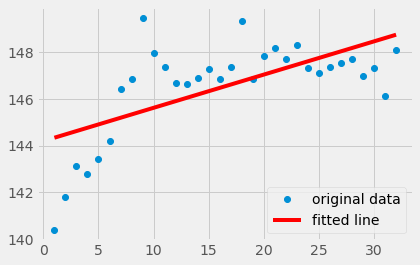

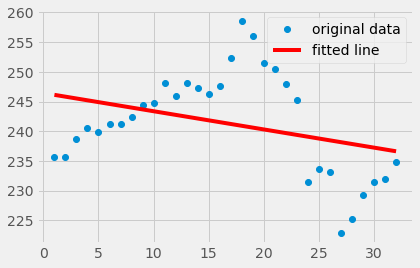

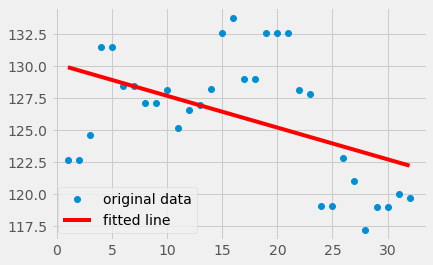

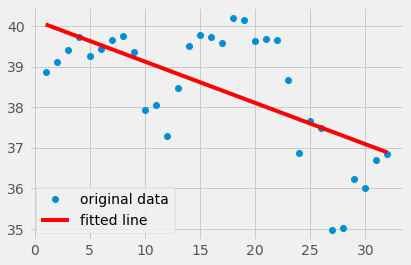

In [632]:
plt.plot(X, y_1, 'o', label='original data')
plt.plot(X, intercept_1 + slope_1*X, 'r', label='fitted line')
plt.legend()
plt.show()

fitted_1=intercept_1 + slope_1*X
test_pred_1=fitted_1- 15.203247


plt.plot(X, y_2, 'o', label='original data')
plt.plot(X, intercept_2 + slope_2*X, 'r', label='fitted line')
plt.legend()
plt.show()

fitted_2=intercept_2 + slope_2*X
test_pred_2=fitted_2- 45.100006



plt.plot(X, y_3, 'o', label='original data')
plt.plot(X, intercept_3 + slope_3*X, 'r', label='fitted line')
plt.legend()
plt.show()

fitted_3=intercept_3 + slope_3*X
test_pred_3=fitted_3- 53.190002


plt.plot(X, y_4, 'o', label='original data')
plt.plot(X, intercept_4 + slope_4*X, 'r', label='fitted line')
plt.legend()
plt.show()

fitted_4=intercept_4 + slope_4*X
test_pred_4=fitted_4- 15.400011






In [633]:

rmse_1 = sqrt(mean_squared_error(test_targets["HON_test"], test_pred_1))
print(rmse_1)

rmse_2 = sqrt(mean_squared_error(test_targets["MMM_test"], test_pred_2))
print(rmse_2)

rmse_3 = sqrt(mean_squared_error(test_targets["BAYZF_test"], test_pred_3))
print(rmse_3)

rmse_4 = sqrt(mean_squared_error(test_targets["SYF_test"], test_pred_4))
print(rmse_4)

11.743510697241584
8.70218504940425
4.251314438488062
6.036163068767322


In [679]:

test_pred_1 = pd.DataFrame(test_pred_1)
test_pred_2 = pd.DataFrame(test_pred_2)
test_pred_3 = pd.DataFrame(test_pred_3)
test_pred_4 = pd.DataFrame(test_pred_4)

submission_HON=pd.concat([Date, test_pred_1], axis=1)

submission_HON=submission_HON.rename(columns = { 
            0:"Close"}  ) 
submission_HON.to_csv("submission_HON.csv",index=False)

submission_MMM=pd.concat([Date, test_pred_2], axis=1)

submission_MMM=submission_MMM.rename(columns = { 
            0:"Close"}  ) 
submission_MMM.to_csv("submission_MMM.csv",index=False)

submission_BAYZF=pd.concat([Date, test_pred_3], axis=1)

submission_BAYZF=submission_BAYZF.rename(columns = { 
            0:"Close"}  ) 
submission_BAYZF.to_csv("submission_BAYZF.csv",index=False)

submission_SYF=pd.concat([Date, test_pred_4], axis=1)

submission_SYF=submission_SYF.rename(columns = { 
            0:"Close"}  ) 
submission_SYF.to_csv("submission_SYF.csv",index=False)



